### AI Bootcamp - June 2024 Cohort - Analyzing and Predicting Flight Delays
Documentation and Context: See the project's ReadMe.md file for documentation on the column names and purposes.

### What's in this workbook?
This is a starter Jupyter Notebook for the project team to use when building out various machine learning models. Each team member will create a copy of this notebook for their work. 

## Libraries Imported
* Pandas
* Numpy
* Matplotlib
* sklearn
    * StandardScaler
    * PCA
    * LabelEncoder

In [586]:
# Do imports
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

### Read In Data to Dataframe

In [587]:
# Create DataFrame
df = pd.read_csv('./data/Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [588]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [589]:
len(df['AirportFrom'].unique())

293

In [590]:
df['Time_encoded'] = df['Time'].apply(lambda x: f"{x // 60:02d}:{x % 60:02d}")
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Time_encoded
0,1,CO,269,SFO,IAH,3,15,205,1,00:15
1,2,US,1558,PHX,CLT,3,15,222,1,00:15
2,3,AA,2400,LAX,DFW,3,20,165,1,00:20
3,4,AA,2466,SFO,DFW,3,20,195,1,00:20
4,5,AS,108,ANC,SEA,3,30,202,0,00:30


In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            539383 non-null  int64 
 1   Airline       539383 non-null  object
 2   Flight        539383 non-null  int64 
 3   AirportFrom   539383 non-null  object
 4   AirportTo     539383 non-null  object
 5   DayOfWeek     539383 non-null  int64 
 6   Time          539383 non-null  int64 
 7   Length        539383 non-null  int64 
 8   Delay         539383 non-null  int64 
 9   Time_encoded  539383 non-null  object
dtypes: int64(6), object(4)
memory usage: 41.2+ MB


### Preprocessing : Encoding 'AirportFrom', 'AirportTo', 'Airline' Columns

In [592]:
airport_codes = df['AirportFrom'].unique()
airport_codes

array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

### Make a copy of Dataframe for preprocessing

In [593]:
encoded_df = df.copy()

In [594]:
unique_codes = encoded_df['AirportFrom'].unique()
code_to_id = {code: idx for idx, code in enumerate(unique_codes, start=1)}

# Apply the mapping to create a new column with unique IDs
encoded_df['AirportFroIDs'] = encoded_df['AirportFrom'].map(code_to_id)
encoded_df['AirportToIDs'] = encoded_df['AirportTo'].map(code_to_id)

encoded_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Time_encoded,AirportFroIDs,AirportToIDs
0,1,CO,269,SFO,IAH,3,15,205,1,00:15,1,103
1,2,US,1558,PHX,CLT,3,15,222,1,00:15,2,109
2,3,AA,2400,LAX,DFW,3,20,165,1,00:20,3,72
3,4,AA,2466,SFO,DFW,3,20,195,1,00:20,1,72
4,5,AS,108,ANC,SEA,3,30,202,0,00:30,4,22
...,...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,23:59,194,229
539379,539380,FL,398,SEA,ATL,5,1439,305,0,23:59,22,55
539380,539381,FL,609,SFO,MKE,5,1439,255,0,23:59,1,17
539381,539382,UA,78,HNL,SFO,5,1439,313,1,23:59,12,1


In [595]:
# Get unique airline codes
unique_airlines = encoded_df['Airline'].unique()

# Create a random mapping for each unique airline code
random.seed(1)  # Set a seed for reproducibility, remove if you want different random results each time
airline_to_id = {airline: random.randint(1000, 9999) for airline in unique_airlines}

# Apply the random mapping to the airline column
encoded_df['airline_id'] = encoded_df['Airline'].map(airline_to_id)

encoded_df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Time_encoded,AirportFroIDs,AirportToIDs,airline_id
0,1,CO,269,SFO,IAH,3,15,205,1,00:15,1,103,3201
1,2,US,1558,PHX,CLT,3,15,222,1,00:15,2,109,2033
2,3,AA,2400,LAX,DFW,3,20,165,1,00:20,3,72,5179
3,4,AA,2466,SFO,DFW,3,20,195,1,00:20,1,72,5179
4,5,AS,108,ANC,SEA,3,30,202,0,00:30,4,22,2931


In [596]:
len(encoded_df["AirportFrom"].unique())

293

In [597]:
len(encoded_df["AirportTo"].unique())

293

In [598]:
# Drop all the categorical columns
encoded_df = encoded_df.drop(columns=['Airline', 'AirportFrom', 'AirportTo'])
encoded_df.head()

,id,Flight,DayOfWeek,Time,Length,Delay,Time_encoded,AirportFroIDs,AirportToIDs,airline_id
0,1,269,3,15,205,1,00:15,1,103,3201
1,2,1558,3,15,222,1,00:15,2,109,2033
2,3,2400,3,20,165,1,00:20,3,72,5179
3,4,2466,3,20,195,1,00:20,1,72,5179
4,5,108,3,30,202,0,00:30,4,22,2931


In [599]:
# Drop unused columns

encoded_df = encoded_df.copy()
encoded_df.drop(['id', 'Time_encoded'], axis=1, inplace=True)


In [600]:
X = encoded_df.copy()
X.drop('Delay', axis=1, inplace=True)
X.head()

,Flight,DayOfWeek,Time,Length,AirportFroIDs,AirportToIDs,airline_id
0,269,3,15,205,1,103,3201
1,1558,3,15,222,2,109,2033
2,2400,3,20,165,3,72,5179
3,2466,3,20,195,1,72,5179
4,108,3,30,202,4,22,2931


In [601]:
y = df['Delay']

In [602]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Scale the Data
SVM, KNN, K-Means, and PCA need scaling

In [603]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.09447296,  1.08199271,  0.01063145, ...,  1.82992654,
        -1.05211002,  1.19989696],
       [ 2.01121043, -1.00719177,  1.00286384, ...,  2.43184152,
        -0.19638348,  0.63696251],
       [-0.8346985 ,  0.55969659, -0.35246809, ..., -1.21132809,
        -0.38654493, -1.28621145],
       ...,
       [ 0.14828415, -1.00719177, -1.26920454, ...,  0.8636946 ,
        -0.83025499,  1.340816  ],
       [ 1.46021769, -0.48489565, -0.83779915, ..., -0.37181509,
        -0.76686784,  1.29483189],
       [ 0.77038833, -0.48489565, -0.22664152, ...,  0.89537434,
        -0.19638348, -1.65668017]])

In [604]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.13268931,  0.03740047, -0.99957617, ..., -1.21132809,
        -0.35485136, -1.28621145],
       [-0.45737249, -0.48489565, -1.44895678, ...,  0.3726587 ,
        -0.87779535, -0.27938204],
       [ 0.77232333,  0.55969659,  0.52831791, ...,  0.10338094,
        -0.37069815, -0.39397147],
       ...,
       [ 1.25752589, -1.52948788, -1.59275858, ...,  1.03793315,
        -0.37069815,  1.29483189],
       [ 0.59527036,  1.60428882,  1.08554987, ..., -1.21132809,
         0.94458524, -0.27938204],
       [-0.66054803,  0.55969659, -0.04688927, ..., -0.0708576 ,
         0.07301191,  1.06157381]])

### SVM

In [605]:
# Create the support vector machine classifier model
svc_model = SVC(kernel='linear', max_iter=10000)

In [606]:
svc_model.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=10000)

In [607]:
# Validate the model by checking the model accuracy with model.score
svc_train_score = svc_model.score(X_train_scaled, y_train) 
print(f'The SVC training score is: {svc_train_score}')
svc_test_score = svc_model.score(X_test_scaled, y_test)
print(f'The SVC testing score is: {svc_test_score}') 

The SVC training score is: 0.4469875437846229
The SVC testing score is: 0.4474659982498554


### Random Forest

In [608]:
# Create and train a randomforest model
random_model = RandomForestClassifier(n_estimators=500, max_depth=5)
random_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500)

In [609]:
# Check the model's balanced accuracy on the TEST set
y_test_pred = random_model.predict(X_test)
ran_test_bal_score = balanced_accuracy_score(y_test, y_test_pred) 
print(ran_test_bal_score)
# print(balanced_accuracy_score(y_test, y_test_pred))

0.6041227116420681


In [658]:
# Check the model's balanced accuracy on the training set
X_train_pred = random_model.predict(X_train)
ran_train_bal_score = balanced_accuracy_score(X_train, X_train_pred)
print(ran_train_bal_score)
# print(balanced_accuracy_score(y_train, y_train_pred))

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

### Logistic Regression

In [611]:
# Create a LogisticRegression function
logistic_regression_model = LogisticRegression(max_iter=1000)

In [612]:
# Fit the model for Logistic Regression
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [613]:
# Score the model
print(f'The training data score: {logistic_regression_model.score(X_train, y_train)}')
print(f'The testing data score: {logistic_regression_model.score(X_test, y_test)}')
      

The training data score: 0.5696190954103085
The testing data score: 0.5709031042819216


In [614]:
# Generate predictions from the model we just fit
log_predictions = logistic_regression_model.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame
log_results_df = pd.DataFrame({'Prediction': log_predictions, 'Actual': y_train})

In [615]:
# Apply the fitted model to the test dataset
log_testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
log_results_df = pd.DataFrame({
    "Testing Data Predictions": log_testing_predictions, 
    "Testing Data Actual Targets": y_test})

In [616]:
# Display the results DataFrame
log_results_df.head()

,Testing Data Predictions,Testing Data Actual Targets
21403,0,0
121631,0,1
535153,0,1
415037,0,0
69899,0,0


In [617]:
# Import the accuracy score function
from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the test dataset
log_accuracy_score = accuracy_score(y_test, log_testing_predictions)
log_accuracy_score

0.5709031042819216

### Summary for All Models

In [618]:
print("SVC")
print(f'SVC testing accuracy score: {svc_test_score}')
print(f'SVC training accuracy score: {svc_train_score}')
print("*" * 20)
print("RANDOM FOREST")
print(f'Random Forest test accuracy score: {ran_test_bal_score}')
print(f'Random Forest training accuracy score: {ran_train_bal_score}')
print("*" * 20)
print("LOGISTIC REGRESSION")
print(f'LogisticRegression accuracy score: {log_accuracy_score}')

SVC
SVC testing accuracy score: 0.4474659982498554
SVC training accuracy score: 0.4469875437846229
********************
RANDOM FOREST
Random Forest test accuracy score: 0.6041227116420681
Random Forest training accuracy score: 0.6032966042517319
********************
LOGISTIC REGRESSION
LogisticRegression accuracy score: 0.5709031042819216


## KMeans 
---
# Original Dataset
 1. Explore the Original Data
    *  Use the elbow method to determine the optimal number for k
    * Plot the graph and print the % change for k value
    * Determine the best number of k
2. Use the optimal number recommended from Elbow Method to instantiate the KMeans model
    - Create and fit KMeans model where n_cluster = optimal elbow k value
    - Make predictions
    - Plot & Visualize data predictions

# Scaled Dataset
1. Split and Scale the data 
    - Using `test_train_split`, split the data. 
    - Scale the data separately 'X_train', 'X-test' using StandardScaler()
2. Use Elbow Method To Determine The Best Value For k
    - Loop through inertia and create a dataframe with k-values
    - Plot the Elbow Curve
    - Print the percent change between k values
3. Use the optimal number for k to create scaled_kmeans_model

# Random Undersampling
1. Split the data using `test_train_split`
2. Instantiate and perform undersampling on training data
3. Instantiate KMeans model and fit the resampled data
4. Make predictions and plot using original data

# Scoring Models
1. Calinski_harabasz_score
* Import `calinski_harabasz_score`
* Score each model using calinski_harabasz_score
* Print the calinski_harabasz_score for each method
    * Original Dataset Predictions
    * Scaled Dataset Predictions
    * Random Undersampling Predictions
2. Silhouette Score (~ 10% of data)
* Import `silhouette_score`
* Get a sample of 10% of the training data


# Original Dataset
## 1. Explore The Original Data

In [619]:
# Make A Copy Of 'encoded_df' Dataframe
k_df = encoded_df.copy()

# Set up X and y variables
X = k_df.copy()
X = X.drop(columns='Delay')

# Set up y variable
y = k_df['Delay']
X.head()

,Flight,DayOfWeek,Time,Length,AirportFroIDs,AirportToIDs,airline_id
0,269,3,15,205,1,103,3201
1,1558,3,15,222,2,109,2033
2,2400,3,20,165,3,72,5179
3,2466,3,20,195,1,72,5179
4,108,3,30,202,4,22,2931


In [620]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
original_X_train = X_train
original_X_test = X_test

### **Original Data**: Elbow method to determine the optimal number for k

In [621]:
# Create an empty list to store the inertia values
inertia = []

# Create a list with the number of k-values to try
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(original_X_train)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow

,k,inertia
0,1,5.022175e+12
1,2,2.508895e+12
2,3,1.546859e+12
3,4,8.839577e+11
4,5,6.996492e+11
5,6,6.183953e+11
6,7,4.329212e+11
7,8,3.385164e+11
8,9,2.573156e+11
9,10,2.396936e+11


### **Original Data**: Plot the graph for elbow curve

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

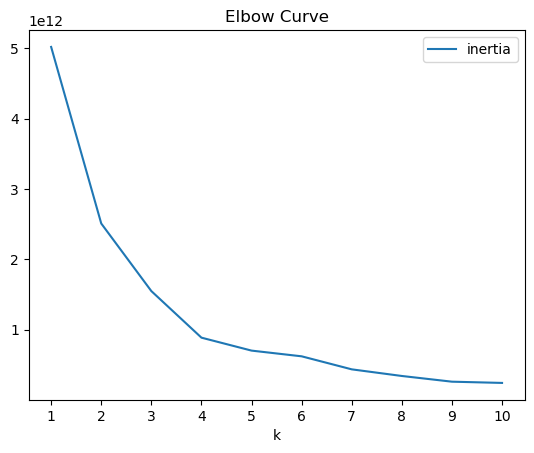

In [622]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

### **Original Data**: Print the percent change between each k-value

In [623]:
# Determine the rate of decrease between each k value. 
k = elbow_data["k"]
inertia = elbow_data["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 50.04%
Percentage decrease from k=2 to k=3: 38.35%
Percentage decrease from k=3 to k=4: 42.85%
Percentage decrease from k=4 to k=5: 20.85%
Percentage decrease from k=5 to k=6: 11.61%
Percentage decrease from k=6 to k=7: 29.99%
Percentage decrease from k=7 to k=8: 21.81%
Percentage decrease from k=8 to k=9: 23.99%
Percentage decrease from k=9 to k=10: 6.85%


## Elbow Results
### **The best value for k is 5**
---

## 2. Use The Recommendeded K-value To Instantiate The KMeans Model

### Create and fit KMeans model with optimal k value and make predictions


In [624]:
# Define the model with 6 clusters
model = KMeans(n_clusters=5, n_init='auto', random_state=1)

# Fit the model
model.fit(original_X_train)

# Make predictions
original_train_labels = model.predict(original_X_train)
original_test_labels = model.predict(original_X_test)


# Cluster Labels
original_labels = model.labels_

# Scaled Dataset

### 1. Split and Scale The Data

### Using `test_train_split`, split the data. 

In [625]:
# Set up X and y variables
X = encoded_df.copy()
X = X.drop(columns='Delay')

y = encoded_df['Delay']

In [626]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [627]:
# Create instance of StandardScaler
scaler = StandardScaler()

# Scale the X training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2. Use Elbow Method To Determine The Best Value For k

### **Scaled Data**: Loop through inertia and create a dataframe with k-values

In [628]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k and add the values to the inertia list.
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(X_train_scaled)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,2.831759e+06
1,2,2.444747e+06
2,3,2.216848e+06
3,4,2.019530e+06
4,5,1.869659e+06
5,6,1.735246e+06
6,7,1.639387e+06
7,8,1.560811e+06
8,9,1.503254e+06
9,10,1.439195e+06


### **Scaled Data**: Plot the Elbow Curve

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

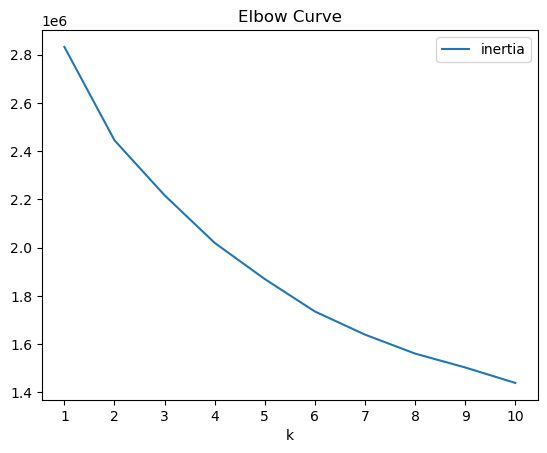

In [629]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

### **Scaled Data**: Print the percent change between k-values

In [630]:
# Determine the rate of decrease between each k value. 
k = elbow_data["k"]
inertia = elbow_data["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 13.67%
Percentage decrease from k=2 to k=3: 9.32%
Percentage decrease from k=3 to k=4: 8.90%
Percentage decrease from k=4 to k=5: 7.42%
Percentage decrease from k=5 to k=6: 7.19%
Percentage decrease from k=6 to k=7: 5.52%
Percentage decrease from k=7 to k=8: 4.79%
Percentage decrease from k=8 to k=9: 3.69%
Percentage decrease from k=9 to k=10: 4.26%


### Elbow curve suggest that the optimal number for k is 3
The rate of decrease in inertia **begins** to slow down between k=3 and k=4, which means that our elbow point is at k=3.

### 3. Use the optimal number for k to create scaled_kmeans_model

In [631]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

# Fit the model
model.fit(X_train_scaled)

# Make predictions
kmeans_train_scaled_labels = model.predict(X_train_scaled)
kmeans_test_scaled_labels = model.predict(X_test_scaled)

# Create labels 
scaled_labels = model.labels_

## Random Undersampling
---
1. Split the data using `test_train_split`
2. Instantiate and perform undersampling on training data
3. Instantiate KMeans model and fit the resampled data
4. Make predictions and plot using original data

### 1. Split the data using `test_train_split`

In [632]:
# Set up X and y variables
X = encoded_df.copy()
X = X.drop(columns='Delay')

# Set up y variable
y = encoded_df['Delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### 2. Instantiate and fit the RandomUnderSampler, random_state = 1 (universal across project)

In [641]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [642]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler to handle class imbalance
rus = RandomUnderSampler(random_state=1)

# Perform undersampling on the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

### 3. Instantiate KMeans model and fit the resampled data

In [643]:
# Fit KMeans on the undersampled data
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_train_resampled)

KMeans(n_clusters=3, random_state=1)

### 4. Make predictions and plot using original data

In [644]:
# Predict clusters for the training and test data
ru_train_labels = kmeans.predict(X_train_resampled)
ru_test_labels = kmeans.predict(X_test)

# Create labels 
ru_labels = kmeans.labels_

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


## Score The KMeans Model
1. Import calinski_harabasz_score
2. Score each model using calinski_harabasz_score
3. Print the calinski_harabasz_score for each method
    * Original Dataset Predictions
    * Scaled Dataset Predictions
    * Random Undersampling Predictions

### 1. Import calinski_harabasz_score

In [645]:
from sklearn.metrics import calinski_harabasz_score

### 2. Score each model using calinski_harabasz_score

In [646]:
# Calculate the Calinski-Harabasz score on the Original training and test data
original_train_score = calinski_harabasz_score(original_X_train, original_train_labels)
original_test_score = calinski_harabasz_score(original_X_test, original_test_labels)

# Calculate the Calinski-Harabasz score on the Scaled training and test data
train_scaled_ch_score = calinski_harabasz_score(X_train_scaled, kmeans_train_scaled_labels)
test_scaled_ch_score = calinski_harabasz_score(X_test_scaled, kmeans_test_scaled_labels)

# Calculate the Calinski-Harabasz score on the Random Undersampled training and test data
train_resampled_ch_score = calinski_harabasz_score(X_train_resampled, ru_train_labels)
test_resampled_ch_score = calinski_harabasz_score(X_test, ru_test_labels)

### 3. Print the Calinski-Harabasz Score for each method

In [647]:
# Print the score for the original training and testing data
print("Original Score")
print(f"Calinski-Harabasz Score on Original Training Data: {original_train_score:.2f}")
print(f"Calinski-Harabasz Score on Original Testing Data: {original_test_score:.2f}\n")

# Print the score for the Scaled data
print("Scaled Score")
print(f"Calinski-Harabasz Score on the Scaled Training Data: {train_scaled_ch_score:.2f}")
print(f"Calinski-Harabasz Score on the Scaled Test Data: {test_scaled_ch_score:.2f}\n")

# Print the score for the Random Undersampled data
print("Undersampled Score")
print(f"Calinski-Harabasz Score on the Undersampled Training Data: {train_resampled_ch_score:.2f}")
print(f"Calinski-Harabasz Score on the Undersampled Test Data: {test_resampled_ch_score:.2f}\n")

Original Score
Calinski-Harabasz Score on Original Training Data: 666470.08
Calinski-Harabasz Score on Original Testing Data: 166181.40

Scaled Score
Calinski-Harabasz Score on the Scaled Training Data: 56106.58
Calinski-Harabasz Score on the Scaled Test Data: 18715.40

Undersampled Score
Calinski-Harabasz Score on the Undersampled Training Data: 50339.99
Calinski-Harabasz Score on the Undersampled Test Data: 36084.42



In [648]:
X_train

,Flight,DayOfWeek,Time,Length,AirportFroIDs,AirportToIDs,airline_id
424905,165,6,806,34,194,12,8737
117085,6585,2,1082,68,232,66,7219
284071,702,5,705,265,2,54,2033
153061,748,4,1121,182,188,23,8364
95458,2801,1,865,166,31,26,9117
...,...,...,...,...,...,...,...
371403,1705,3,635,155,55,72,5179
491263,755,3,540,131,23,130,8090
470924,2734,2,450,224,133,26,9117
491755,5446,3,570,78,55,30,8993


## 2. Silhouette Score
### Import `silhouette_score`

In [649]:
from sklearn.metrics import silhouette_score

### Score the Original Dataset

In [650]:
# Step 1: Sample about 10% of the data 
X_training_sample = X_train.sample(n=40000, random_state=1)

# Step 2: Fit the KMeans model on the full dataset (optional)
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)

# Step 3: Get cluster labels for the full dataset
full_cluster_labels = kmeans.labels_

# Step 4: Calculate Silhouette Score using the sampled data only
# Get labels for the sampled data
sampled_labels = kmeans.predict(X_training_sample)

# Calculate silhouette score for the sampled data and labels
silhouette = silhouette_score(X_training_sample, sampled_labels)
print(f"Silhouette Score on Original Data: {silhouette:.2f}")

Silhouette Score on Original Data: 0.53


### Score The Scaled Dataset

In [651]:
X_scaled_df = pd.DataFrame(X_train_scaled)

In [652]:
# Step 1: Sample about 10% of the data 
X_scaled_training_sample = X_scaled_df.sample(n=40000, random_state=1)

# Step 2: Fit the KMeans model on the full dataset (optional)
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_scaled_df)

# Step 3: Get cluster labels for the full dataset
full_cluster_labels = kmeans.labels_

# Step 4: Calculate Silhouette Score using the sampled data only
# Get labels for the sampled data
sampled_labels = kmeans.predict(X_scaled_training_sample)

# Calculate silhouette score for the sampled data and labels
silhouette = silhouette_score(X_scaled_training_sample, sampled_labels)
print(f"Silhouette Score on Scaled Data: {silhouette:.2f}")

Silhouette Score on Scaled Data: 0.13


### Score The Random Undersampled Dataset

In [655]:
X_train_resampled = pd.DataFrame(X_train_resampled)
X_train_resampled

,0,1,2,3,4,5,6
0,0.257612,-0.484896,0.150838,-1.102187,-0.102537,0.215633,-1.656680
1,0.320983,1.081993,0.654144,-0.973681,-0.102537,0.389948,-1.497219
2,-0.941124,0.037400,-0.460319,1.082411,-1.132129,-0.386545,-1.286211
3,0.820698,-1.529488,-0.837799,-0.916567,-0.831171,1.721078,-0.393971
4,-1.068834,0.559697,-1.621519,-1.302085,-1.052929,1.990473,1.199897
...,...,...,...,...,...,...,...
360407,-0.196631,0.559697,0.420467,2.039065,-0.197577,1.736925,-0.119550
360408,0.219879,0.559697,1.391129,-0.102697,-0.530214,-1.004570,-1.497219
360409,-0.377070,0.559697,0.564268,0.197149,0.388499,-0.085456,-0.853071
360410,-0.594274,-1.007192,-0.532220,-0.245482,-0.577733,0.944585,-0.279382


In [656]:
# Step 1: Sample about 10% of the data 
X_resampled_training_sample = X_train_resampled.sample(n=40000, random_state=1)

# Step 2: Fit the KMeans model on the full dataset (optional)
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_train_resampled)

# Step 3: Get cluster labels for the full dataset
full_cluster_labels = kmeans.labels_

# Step 4: Calculate Silhouette Score using the sampled data only
# Get labels for the sampled data
sampled_labels = kmeans.predict(X_resampled_training_sample)

# Calculate silhouette score for the sampled data and labels
silhouette = silhouette_score(X_resampled_training_sample, sampled_labels)
print(f"Silhouette Score on Random UnderSampled Data: {silhouette:.2f}")

Silhouette Score on Random UnderSampled Data: 0.13


## KMeans Model Optimization
1. Create `AirportRoute` Column
* Combine the `AirportFrom` and `AirportTo` Column to make `AirportRoute` column
2. Encode `AirportFrom`, `AirportTo`, `AirportRoute` Column Using `LabelEncoder`
* Label encode the AirportRoute column to convert unique routes into numerical values
3. Feature Selection
* The following columns will be dropped as they represent an id:
    * `Airline`
    * `id`
* `AirportFro` `AirportTo` are combined to one columns `airportRoute`
3. Scale Using MinMaxScaler()
* Use MixMaxScaler to scale the encoded labels between 0 and 1
4. Fit KMeans and Use the Elbow Method
* Apply KMeans clustering 
* Use elbow method to determine optimal value for k
5. Evaluate Clustering Quality Using Silhouette Analysis
* Use silhouette score to evaluate teh quality of clusters
---

### 1. Create `AirportRoute` Column

In [777]:
# Make a copy of the original dataframe
optimized_df = df.copy()
optimized_df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Time_encoded
0,1,CO,269,SFO,IAH,3,15,205,1,00:15
1,2,US,1558,PHX,CLT,3,15,222,1,00:15
2,3,AA,2400,LAX,DFW,3,20,165,1,00:20
3,4,AA,2466,SFO,DFW,3,20,195,1,00:20
4,5,AS,108,ANC,SEA,3,30,202,0,00:30


### Combine the AirportFrom and AirportTo Column to make `AirportRoute` column

In [778]:
# Create 'AirportRoute' column by combining 'AirportFrom' and 'AirportTo' columns
optimized_df['AirportRoute'] = optimized_df['AirportFrom'] + '-' + optimized_df['AirportTo']

# Drop 'id', 'Airport_From', and 'AirportTo' columns
optimized_df = optimized_df.drop(columns=['id', 'Time_encoded', 'Flight','Delay'])
optimized_df.head()

,Airline,AirportFrom,AirportTo,DayOfWeek,Time,Length,AirportRoute
0,CO,SFO,IAH,3,15,205,SFO-IAH
1,US,PHX,CLT,3,15,222,PHX-CLT
2,AA,LAX,DFW,3,20,165,LAX-DFW
3,AA,SFO,DFW,3,20,195,SFO-DFW
4,AS,ANC,SEA,3,30,202,ANC-SEA


### 2. Encode `AirportFrom`, `AirportTo`, `AirportRoute` Column Using `LabelEncoder`

In [779]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to the 'AirportRoute' column
label_encoder = LabelEncoder()
optimized_df['AirportRouteEncoded'] = label_encoder.fit_transform(optimized_df['AirportRoute'])
print("\nData with Encoded AirportRoute Column:\n", optimized_df)



Data with Encoded AirportRoute Column:
        Airline AirportFrom AirportTo  DayOfWeek  Time  Length AirportRoute  \
0           CO         SFO       IAH          3    15     205      SFO-IAH   
1           US         PHX       CLT          3    15     222      PHX-CLT   
2           AA         LAX       DFW          3    20     165      LAX-DFW   
3           AA         SFO       DFW          3    20     195      SFO-DFW   
4           AS         ANC       SEA          3    30     202      ANC-SEA   
...        ...         ...       ...        ...   ...     ...          ...   
539378      CO         OGG       SNA          5  1439     326      OGG-SNA   
539379      FL         SEA       ATL          5  1439     305      SEA-ATL   
539380      FL         SFO       MKE          5  1439     255      SFO-MKE   
539381      UA         HNL       SFO          5  1439     313      HNL-SFO   
539382      US         LAX       PHL          5  1439     301      LAX-PHL   

        AirportRouteEn

### Encode the 'Airline' and 'AirportRoute' columns using `LableEncoder`

In [780]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to the 'AirportRoute' column
label_encoder = LabelEncoder()
optimized_df['AirportRouteEncoded'] = label_encoder.fit_transform(optimized_df['AirportRoute'])


# Apply LabelEncoder to the 'Airline' column
optimized_df['AirlineEncoded'] = label_encoder.fit_transform(optimized_df['Airline'])

# Drop the 'Airline' and 'AirportRoute' Columns
optimized_df = optimized_df.drop(columns=['AirportRoute', 'Airline'])

optimized_df.head()

,AirportFrom,AirportTo,DayOfWeek,Time,Length,AirportRouteEncoded,AirlineEncoded
0,SFO,IAH,3,15,205,3740,4
1,PHX,CLT,3,15,222,3265,14
2,LAX,DFW,3,20,165,2159,1
3,SFO,DFW,3,20,195,3731,1
4,ANC,SEA,3,30,202,83,2


### Encode the 'AirportFrom' and 'AirportTo' columns using `LableEncoder`

In [782]:
# Encode the 'AirportFrom' Column
optimized_df['AirportFromEncoded'] = label_encoder.fit_transform(optimized_df['AirportFrom'])

# Encode the 'AirportTo' Column
optimized_df['AirportToEncoded'] = label_encoder.fit_transform(optimized_df['AirportTo'])

# Drop the 'AirportFrom' and 'AirportTo' Columns
optimized_df = optimized_df.drop(columns=['AirportFrom', 'AirportTo'])
optimized_df.head()

,DayOfWeek,Time,Length,AirportRouteEncoded,AirlineEncoded,AirportFromEncoded,AirportToEncoded
0,3,15,205,3740,4,253,135
1,3,15,222,3265,14,217,60
2,3,20,165,2159,1,154,80
3,3,20,195,3731,1,253,80
4,3,30,202,83,2,14,252


### 3. Scale Data Using MinMaxScaler()

In [837]:
from sklearn.preprocessing import MinMaxScaler
X = optimized_df.copy()
# Apply MinMaxScaler to the DataFrame
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
print("\nData with Scaled Using MinMaxScaler:\n", scaled_df)


Data with Scaled Using MinMaxScaler:
 [[0.33333333 0.00349895 0.3129771  ... 0.23529412 0.86643836 0.46232877]
 [0.33333333 0.00349895 0.3389313  ... 0.82352941 0.74315068 0.20547945]
 [0.33333333 0.0069979  0.2519084  ... 0.05882353 0.52739726 0.2739726 ]
 ...
 [0.66666667 1.         0.38931298 ... 0.47058824 0.86643836 0.63013699]
 [0.66666667 1.         0.4778626  ... 0.76470588 0.43835616 0.86643836]
 [0.66666667 1.         0.45954198 ... 0.82352941 0.52739726 0.73972603]]


### 4. Fit KMeans and Use the Elbow Method

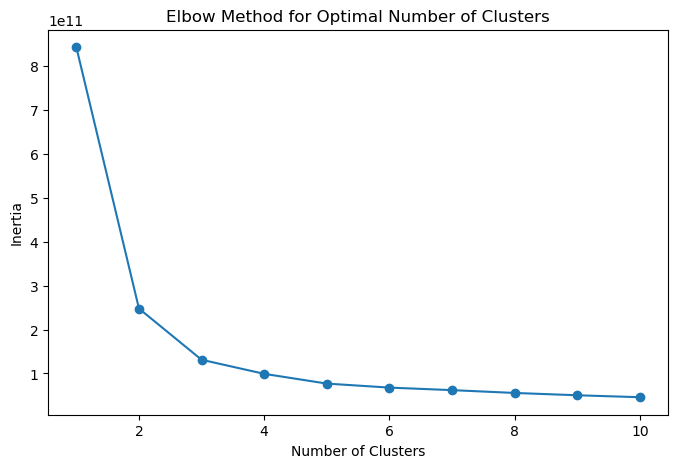

In [838]:
# Use the Elbow Method to find the optimal number of clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=1)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

Silhouette Score for 2 clusters: 0.56
Silhouette Score for 3 clusters: 0.50
Silhouette Score for 4 clusters: 0.42
Silhouette Score for 5 clusters: 0.39
Silhouette Score for 6 clusters: 0.34
Silhouette Score for 7 clusters: 0.34
Silhouette Score for 8 clusters: 0.32
Silhouette Score for 9 clusters: 0.32
Silhouette Score for 10 clusters: 0.33


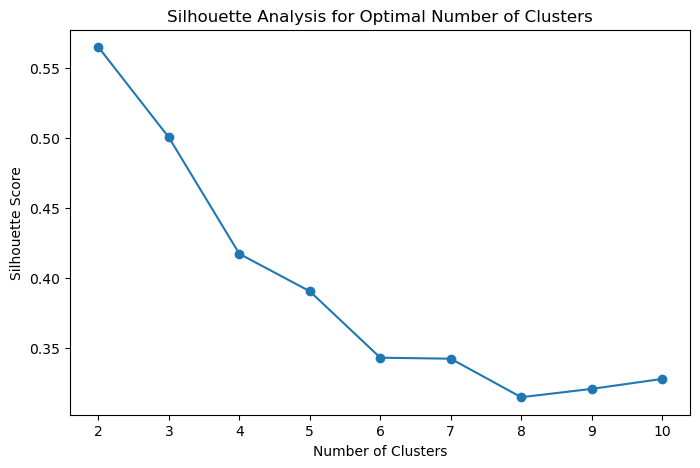

In [840]:
from sklearn.metrics import silhouette_score

X_sampled = X.sample(frac=0.1, random_state=1)

# Step 5: Use Silhouette Analysis to evaluate cluster quality
silhouette_scores = []
for n in range(2, 11):  # Start from 2 because Silhouette Score requires at least 2 clusters
    kmeans = KMeans(n_clusters=n, random_state=1)
    cluster_labels = kmeans.fit_predict(X_sampled)
    silhouette_avg = silhouette_score(X_sampled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {n} clusters: {silhouette_avg:.2f}")

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

In [841]:
# Fit the KMeans model using 2 clusters
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(X)  # Use the scaled data

# Get cluster labels
cluster_labels = kmeans.labels_

# Print the final cluster centers and labels (optional)
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Cluster Labels:\n", cluster_labels)

Cluster Centers:
 [[   3.93535025  794.8539385   134.95220671 3080.94999382    9.77603686
   211.11536449  146.51044309]
 [   3.92374809  810.9327572   129.33698997  984.1309463     8.87458409
    74.32016792  141.67704986]]
Cluster Labels:
 [0 0 0 ... 0 1 0]


The fourth cluster has a significant different between the two centers, showing feature 4 has a great affect on the clustering.

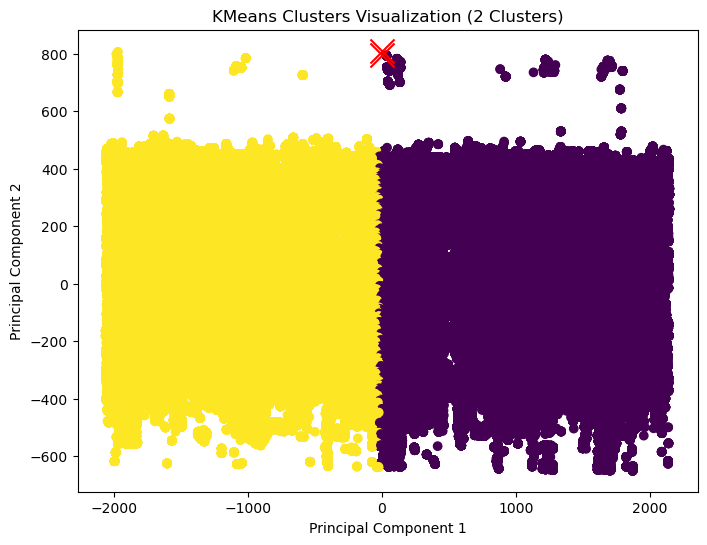

In [842]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization (optional)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')  # Plot cluster centers
plt.title('KMeans Clusters Visualization (2 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Model Optimization With PCA
1. Scale Data Using StandardScaler()
2. Apply PCA To Reduce To Two Dimensions
3. Calculate the WCSS
4. Silhouette Analysis

# Hyperparameter Tuning
1. Tune init method using kmeans ++
2. Optimize max_iter and Set n_init
3. Use MiniBatchKMeans
4. Evaluate & Interpret Results
---



### 1. Scale Data Using StandardScaler()

In [843]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [844]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

### 3. Calculate Within-Cluster Sum of Squares For Each Cluster

In [845]:
wcss = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=1)
    kmeans.fit(X_scaled)  # Use scaled data
    wcss.append(kmeans.inertia_)

### Plot The Elbow Curve

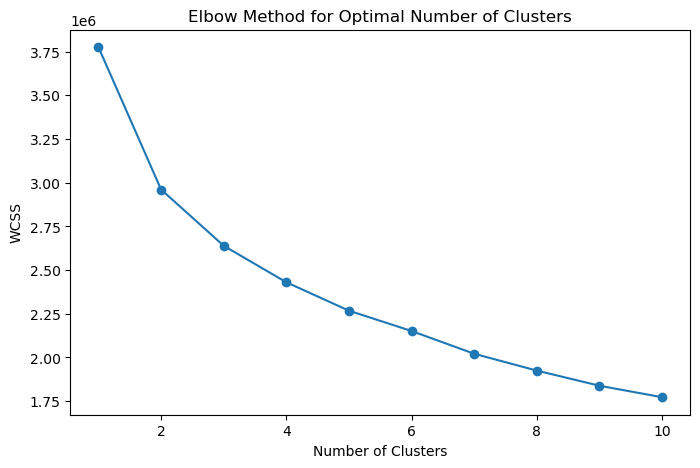

In [846]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### 4. Silhouette Analysis
#### Tuning
* Stopped: After 10 Min runtime, due to runtime and memory usage. Decided to sample data 20% of data for analysis.


In [847]:
X_scaled = pd.DataFrame(X_scaled)

### Run Silhoutte Analysis For Different Cluster Numbers To Choose The Best One

In [849]:
X_sampled = X.sample(frac=0.1, random_state=1)

silhouette_scores = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=1)
    cluster_labels = kmeans.fit_predict(X_sampled)
    silhouette_avg = silhouette_score(X_sampled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {n} clusters: {silhouette_avg:.2f}")

Silhouette Score for 2 clusters: 0.56
Silhouette Score for 3 clusters: 0.50
Silhouette Score for 4 clusters: 0.42
Silhouette Score for 5 clusters: 0.39
Silhouette Score for 6 clusters: 0.34
Silhouette Score for 7 clusters: 0.34
Silhouette Score for 8 clusters: 0.32
Silhouette Score for 9 clusters: 0.32
Silhouette Score for 10 clusters: 0.33


# Hyperparameter Tuning
* Intial : Used StandardScaler(), PCA  - .32 Score
* 2nd: Change the sample set to 10% for processing purposes 
* 3rd:  Only used PCA, taking out StandardScaler()


### Tune init method using kmeans ++

In [850]:
# Define a function for model evaluation
def evaluate_model(model, X):
    """Evaluate clustering models with multiple metrics."""
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    print(f"Silhouette Score: {silhouette:.2f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz:.2f}")
    return silhouette, calinski_harabasz

### 1. Optimize max_iter and Set n_init
* Scale the data
* Set max_iter and n_init

In [852]:
# Scale the data using PCA
X_scaled = pca.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [856]:
X_sampled = X_scaled.sample(frac=0.2, random_state=1)

optimized_kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=1)
evaluate_model(optimized_kmeans, X_sampled)

### 2. Use MiniBatchKMeans

In [854]:
from sklearn.cluster import MiniBatchKMeans

optimized_mini_kmeans = MiniBatchKMeans(n_clusters=2, batch_size=100, random_state=1)
evaluate_model(optimized_mini_kmeans, X_sampled)

Silhouette Score: 0.57
Calinski-Harabasz Score: 264670.86


(0.5722248575170946, 264670.85601354006)

### 3. Evaluate and Interpret the Results

### Silhouette Analysis 
**0.57** shows that the clusters are faily well defined. There may be some overlap.  

### MiniBatchKMeans
MiniBatchKMeans did not have an affect on the dataset at all. The score was the same **.057**